## Load Image
This notebook presents Python alternatives to the critical functions used in CoastSnap to load an image to be analysed. See the notebook Load_Image_MATLAB for more detail of the original MATLAB functions.

In [1]:
#import the required modules
import scipy.io

#load the variables to be used from MATLAB
mat = scipy.io.loadmat('load_Image_Python.mat')

### 1. Clear current figures and data.
### 2. Get the image's "navigation" info if the image has already, previously been loaded.
### 3. Prompt the user to select the processed image.

In [2]:
#define the path variable loaded from MATLAB
path = mat['path'][0]

**Note:** here the path separators are / since I am using an apple machine. Since the path is manually defined by each user, the path separator should always match their machine. In the MATLAB version, a universal separator could be used to make sure. I have not found a way to do this here.

Generate a dialog box to select the image of interest.

In [3]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(initialdir= path, filetypes=[("jpeg files", "*.jpg")])

Here the file path includes the file name too (in contrast to MATLAB, where the two are given independently)

In [4]:
file_path

'/Users/nickheaney/Desktop/CoastSnap/Code/Images/manly/Processed/2017/1495147020.Fri.May.19_08_37_00.AEST.2017.manly.snap.IanCoghlan.jpg'

### 4. Read and display the image file.

The complete path (including the file name) has already been generated in the previous step so this can be passed directly to ***mpimg.imread*** to read the image:

In [6]:
#import the required module
import matplotlib.image as mpimg

#note: file_path has been defined in the code cell above
I = mpimg.imread(file_path)

**Note:** If you are receiving an error message, ensure you have selected an image in step 3.

Display the image using ***plt.imshow***

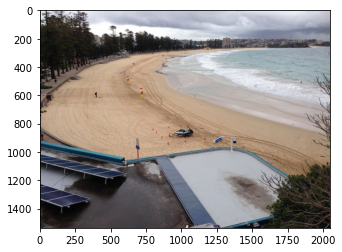

In [8]:
import matplotlib.pyplot as plt
plt.imshow(I)

### 5. Check if the image has already been rectified.

To do this, we can use ***str.replace*** to take the path to the file of the currently displayed "Processed" image and alter it to the file path of what would be the corresponding "Rectified" image if it exists (i.e. it replaces the 'Precessed' folder with the 'Rectified' folder in the image path:

In [9]:
rect_path = file_path.replace('Processed','Rectified')

For the other possible cases and the amendment of the part of the file name to plan:

In [16]:
rect_path = rect_path.replace('Registered','Rectified') #For Registered images
rect_path = rect_path.replace('snap','plan') #Rectified is called plan to keep with Argus conventions
rect_path = rect_path.replace('timex','plan') #For timex images

Now the ***path.exists*** function from os path is used to verify if the path of the rectified image exists and hence if the image has previously been rectified:

In [17]:
import os.path
from os import path

path.exists(rect_path)

True

### 6. Check if the image has already been shoreline mapped.

This step uses the same process as in step 5 above. There are additional functions which have been written exclusively for CoastSnap, however, their conversion does not pose any difficulties and will be left for the final coding task.

### 7. Extract data from the site's database (Excel spreadsheet).

Defining the variables which are normally defined using CSPparseFilename and CSPloadPaths. (These functions have not been converted yet but do not require specialist functions to do so.

In [19]:
#defining the site name, this would nomally be done through CSPparseFilename
site = 'manly'

#defining the database path, this would normally be generated by CSPloadPaths
DB_path = '/Users/nickheaney/Desktop/CoastSnap/Code/Database'

The database (Excel) file name is joined to the end of the data base path:

In [20]:
dbfile = os.path.join(DB_path, 'CoastSnapDB' + '.xlsx')

Pandas is now used to read the .xlsx file:

In [23]:
#import required library (pandas)
import pandas as pd

#read the .xlsx file 
raw = pd.ExcelFile(dbfile)

### 8. Get the tide level for the loaded image.

The steps involved at this stage (see Load_Image_MATLAB notebook for more details) require functions written exclusively for MATLAB. Their conversion to Python has not been undertaken yet as this step is not foreseen to present any coding challenges.